In [2]:
from datasets import load_dataset
import pandas as pd
ds = load_dataset(
    "tarekmasryo/hospital-deterioration-dataset",
    split="train",
    streaming=True
)
rows = []
for i, row in enumerate(ds):
    if i == 50000:
        break
    rows.append(row)
df = pd.DataFrame(rows)
df.shape

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

(50000, 28)

In [3]:
df.shape

(50000, 28)

In [4]:
df.isnull().sum()

,0
patient_id,0
hour_from_admission,0
heart_rate,0
respiratory_rate,0
spo2_pct,0
temperature_c,0
systolic_bp,0
diastolic_bp,0
oxygen_device,0
oxygen_flow,0


In [5]:
int(df.duplicated().sum())

0

In [6]:
df.head(10)

,patient_id,hour_from_admission,heart_rate,respiratory_rate,spo2_pct,temperature_c,systolic_bp,diastolic_bp,oxygen_device,oxygen_flow,...,age,gender,comorbidity_index,admission_type,baseline_risk_score,los_hours,deterioration_event,deterioration_within_12h_from_admission,deterioration_hour,deterioration_next_12h
0,1,0,68.58,14.47,96.52,37.18,108.94,78.43,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
1,1,1,67.03,13.87,94.94,37.25,111.73,79.14,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
2,1,2,69.05,14.63,94.45,37.29,111.48,78.86,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
3,1,3,69.07,14.42,95.16,37.27,110.68,76.79,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
4,1,4,73.35,15.62,95.83,37.21,110.38,75.47,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
5,1,5,73.39,15.44,94.21,37.28,109.26,75.58,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
6,1,6,74.22,15.37,94.37,37.24,108.75,74.17,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
7,1,7,73.40,15.12,94.83,37.21,108.90,71.97,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
8,1,8,73.35,14.06,94.53,37.23,106.08,71.13,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0
9,1,9,71.29,12.98,94.79,37.10,107.75,72.03,none,0.0,...,24,M,2,Elective,0.2173,17,0,0,-1,0


In [7]:
categorical_col=df.select_dtypes(include=["object"]).columns
numerical_col=df.select_dtypes(include=["int64","float64"]).columns
print("\ncategorical columns:",categorical_col)
print("\nnumerical columns:",numerical_col)


categorical columns: Index(['oxygen_device', 'gender', 'admission_type'], dtype='object')

numerical columns: Index(['patient_id', 'hour_from_admission', 'heart_rate', 'respiratory_rate',
       'spo2_pct', 'temperature_c', 'systolic_bp', 'diastolic_bp',
       'oxygen_flow', 'mobility_score', 'nurse_alert', 'wbc_count', 'lactate',
       'creatinine', 'crp_level', 'hemoglobin', 'sepsis_risk_score', 'age',
       'comorbidity_index', 'baseline_risk_score', 'los_hours',
       'deterioration_event', 'deterioration_within_12h_from_admission',
       'deterioration_hour', 'deterioration_next_12h'],
      dtype='object')


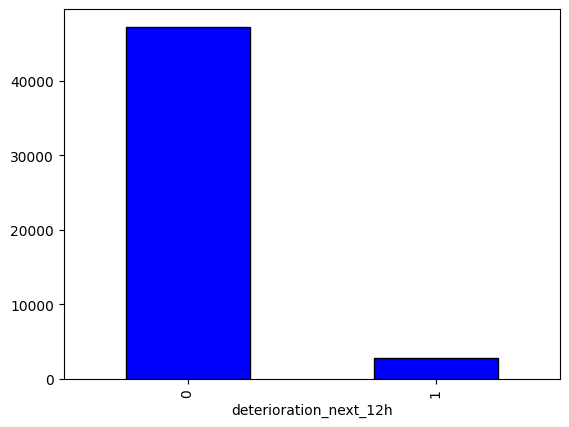

In [8]:
import matplotlib.pyplot as plt
df["deterioration_next_12h"].value_counts().plot(kind="bar",color="blue",edgecolor="black")
plt.show()

In [9]:
df["deterioration_next_12h"].value_counts()

,count
deterioration_next_12h,
0,47278
1,2722


In [10]:
df["age"].describe()

,age
count,50000.00000
mean,54.84878
std,20.93942
min,18.00000
25%,37.00000
50%,55.00000
75%,73.00000
max,90.00000


In [11]:
df["gender"].value_counts()

,count
gender,
M,27668
F,22332


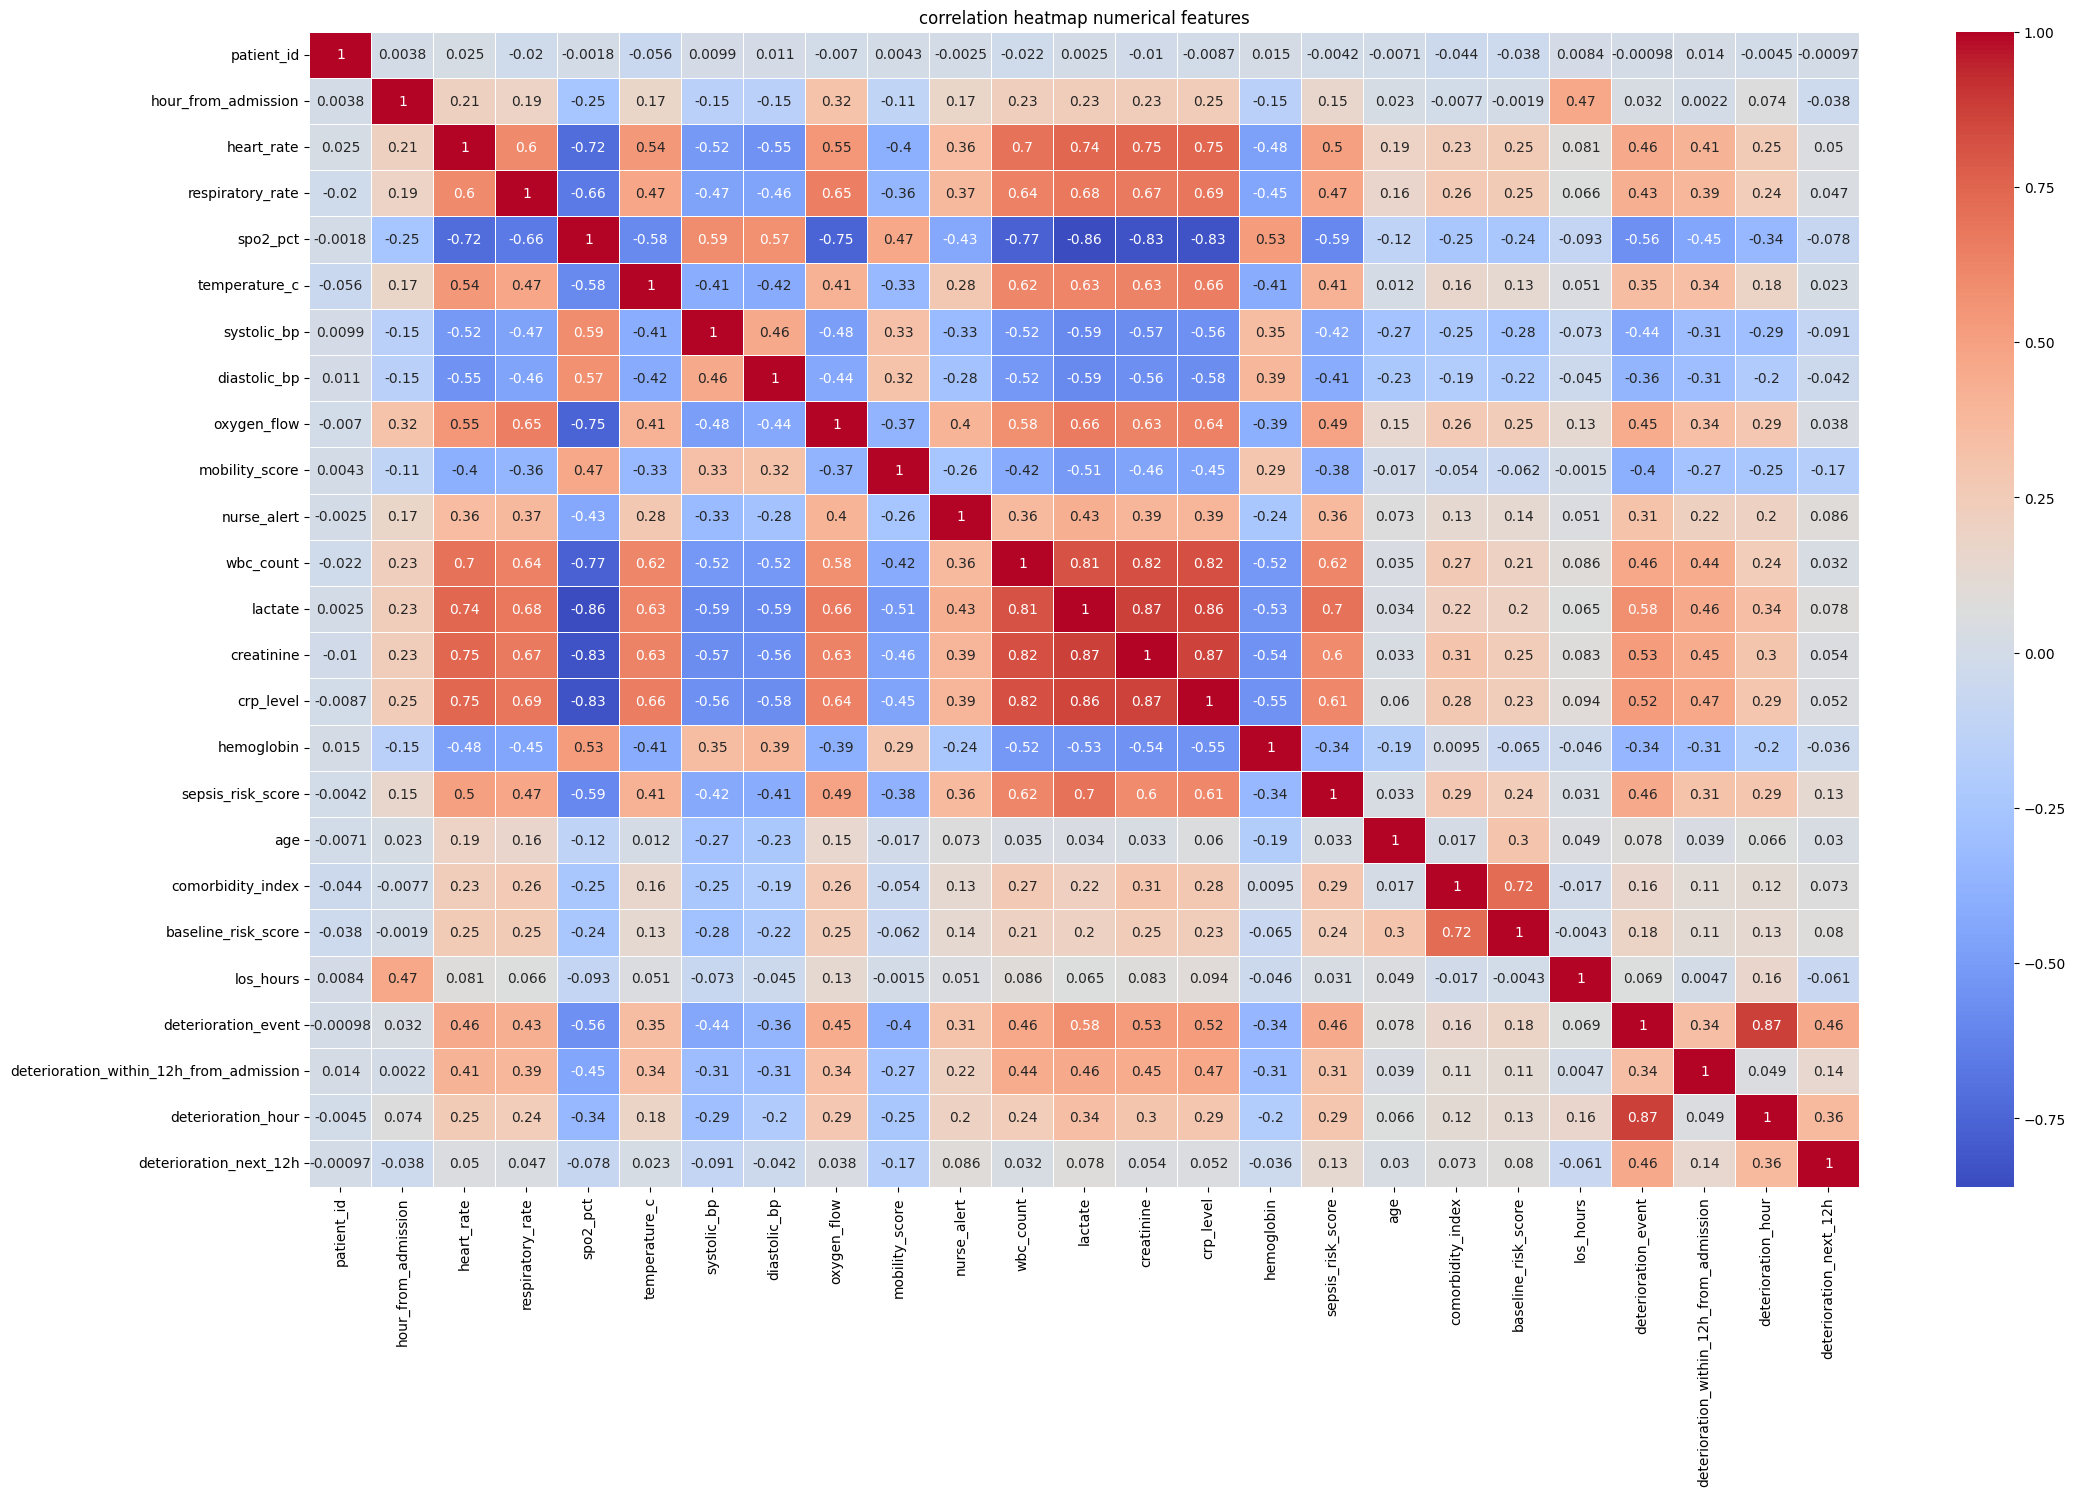

In [12]:
import seaborn as sns
import numpy as np
corr_matrix=df[numerical_col].corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.5)
plt.title("correlation heatmap numerical features")
plt.show()

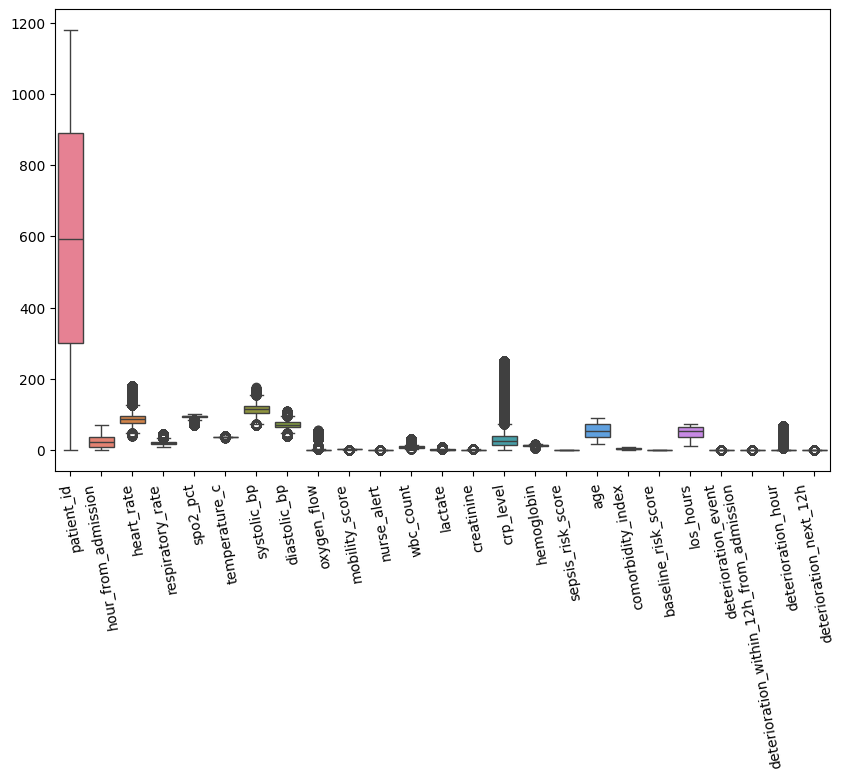

In [31]:
import seaborn as sns
numerical_col = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
plt.xticks(rotation=100)
sns.boxplot(data=numerical_col)
plt.show()

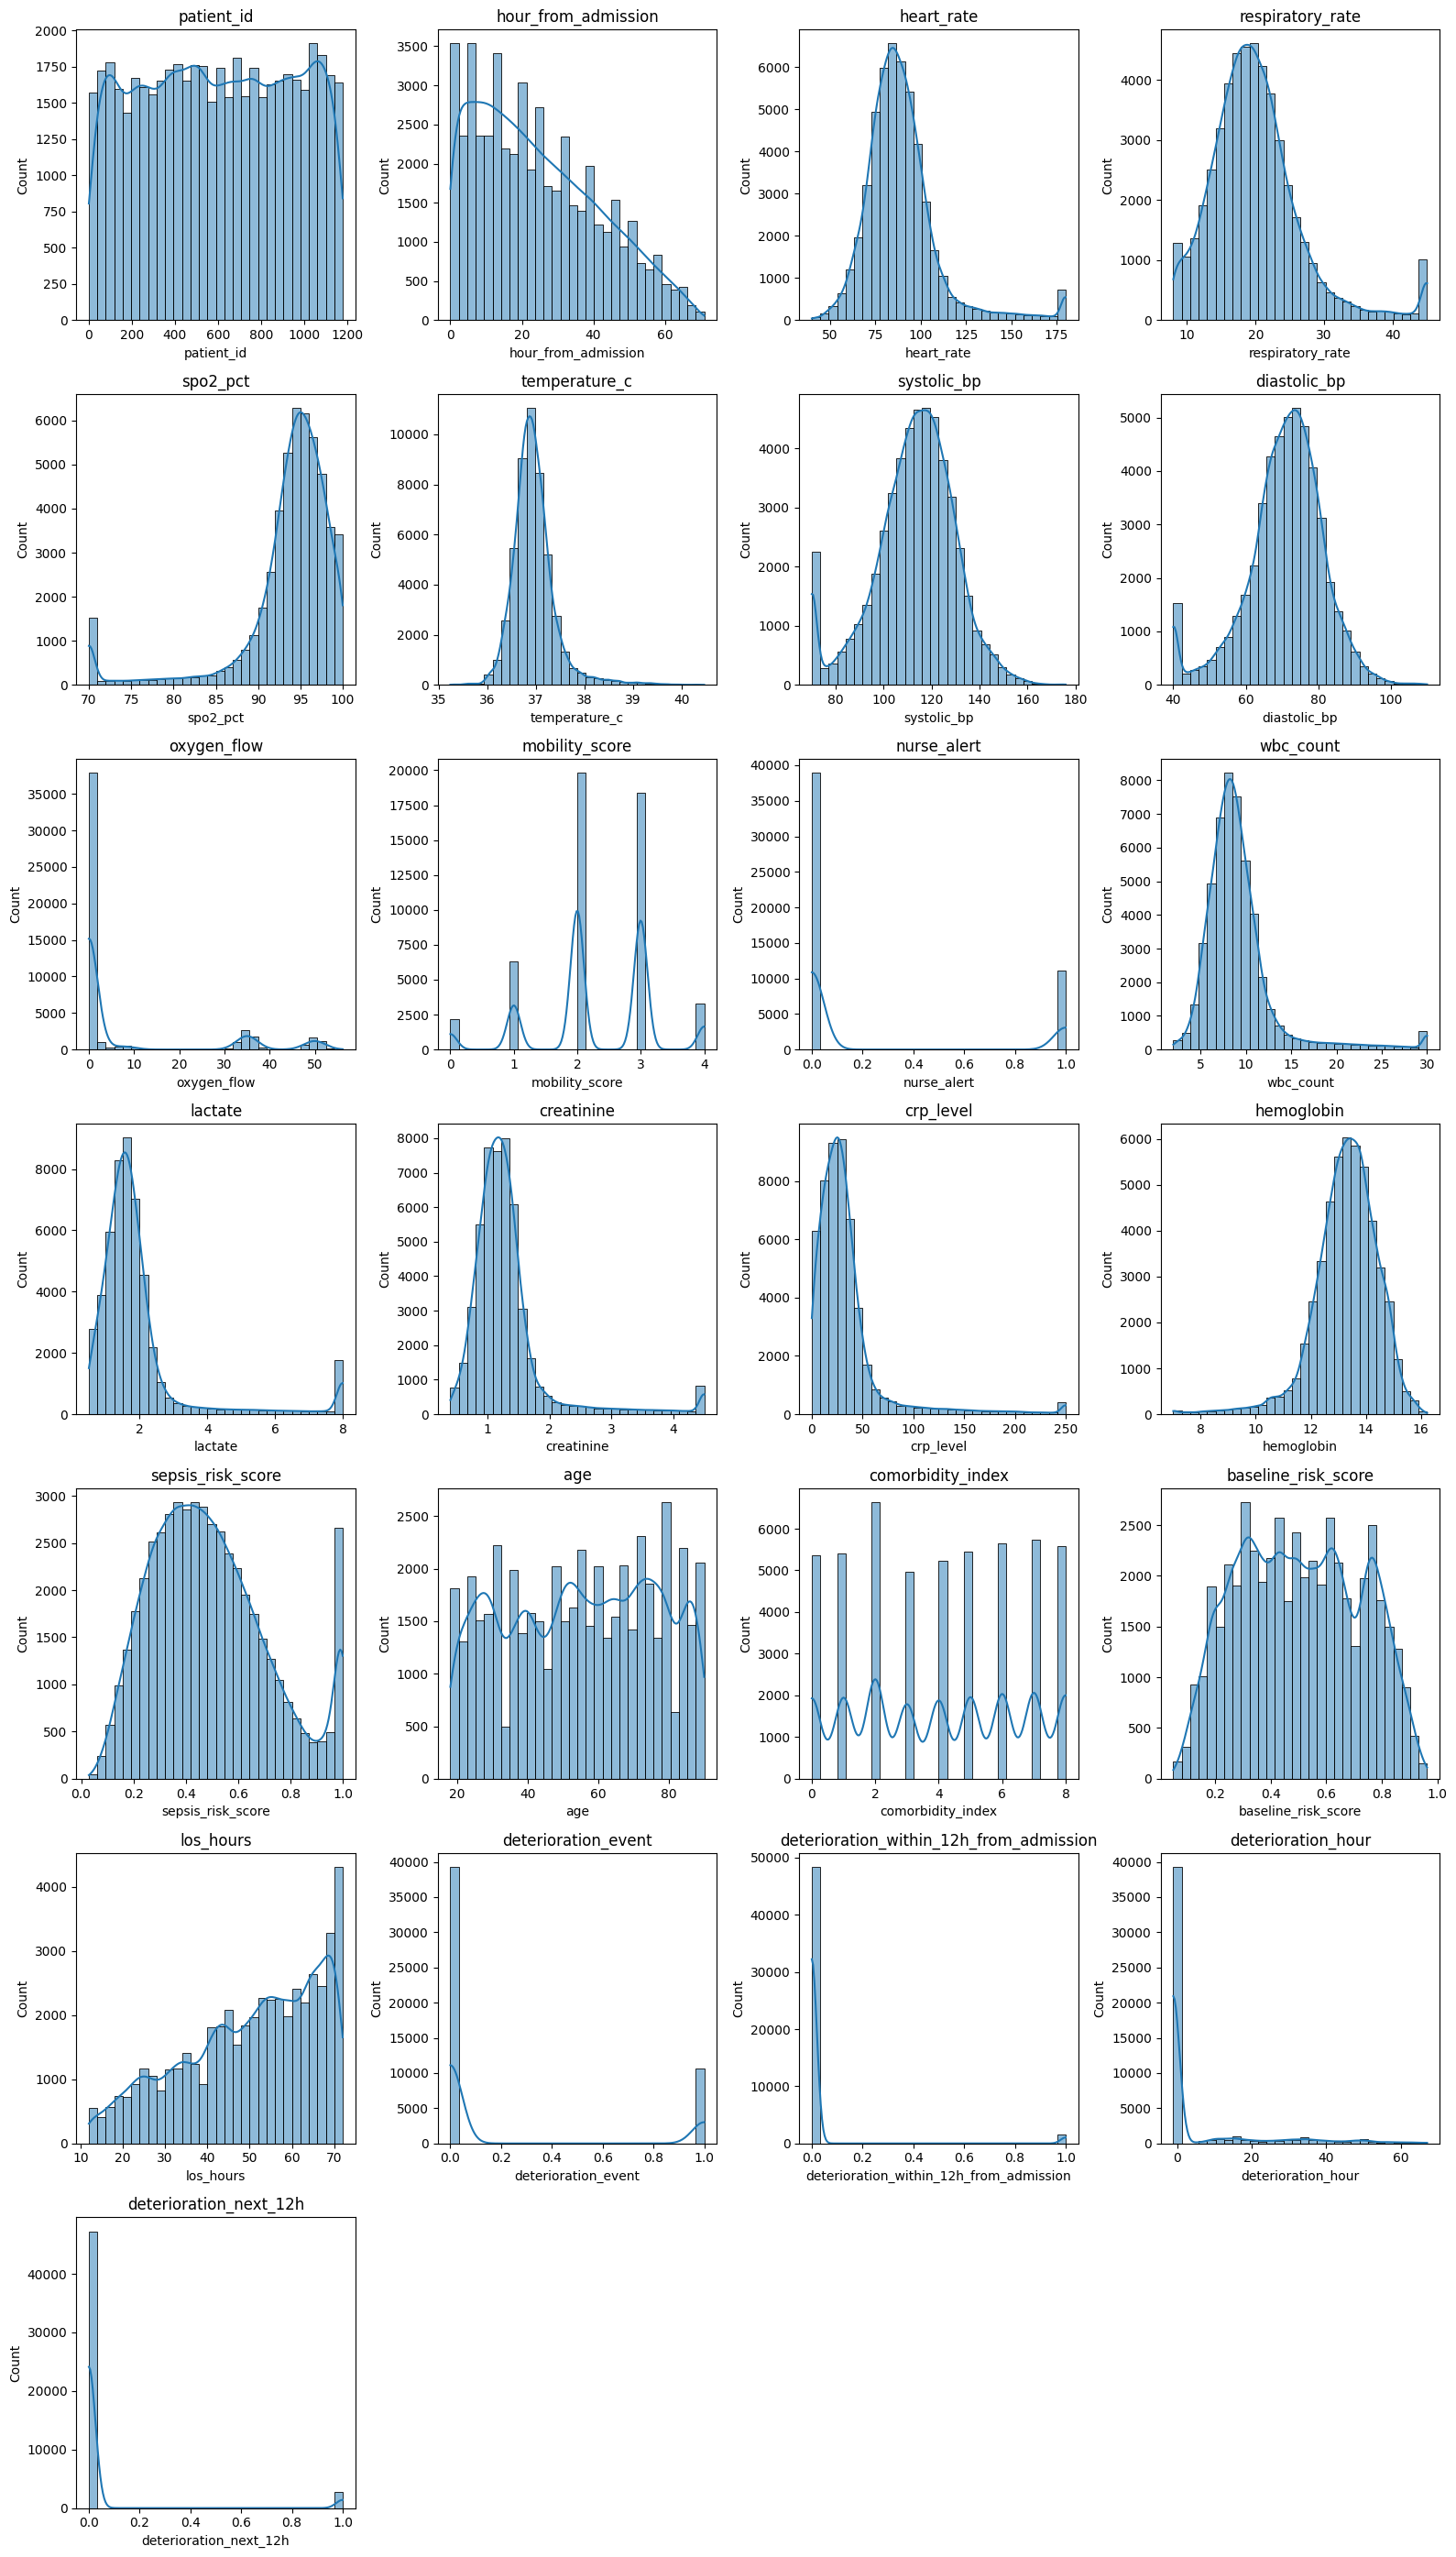

In [30]:
import math
cols = numerical_col.columns
n = len(cols)
rows = math.ceil(n / 4)
plt.figure(figsize=(16, rows*4))
for i, col in enumerate(cols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
